<a href="https://colab.research.google.com/github/RLungWu/Dive-into-DL/blob/main/Chapter/DIDL_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mission:  
Complete the implementation in ch3.2

In [ ]:
from datetime import datetime

now = datetime.now().strftime("%Y-%m-%d %H:%M:%S %p")
print(f"Start at {now}")

Start at 2024-03-25 15:58:46 PM


In [ ]:
!pip install d2l==0.14.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.7 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 3.2.1 生成數據集
使用線性模型 w=[2, -3.5]^T, b = 4.2, ϵ  
y = Xw + b + ϵ

In [ ]:
def synthetic_data(w, b, num_examples):
  #生成y=xw+b+noise
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1,1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print(f"features: {features[0]} \n label: {labels[0]}")

features: tensor([-0.5719, -0.3497]) 
 label: tensor([4.2339])


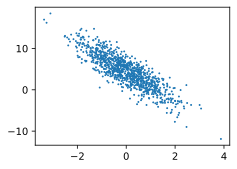

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

## 3.2.2 讀取數據集

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #Random pick, without specific order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9499, -0.3493],
        [ 0.0995, -0.4130],
        [ 1.8805,  0.5100],
        [ 0.0901,  0.2897],
        [ 0.3906, -1.4474],
        [ 0.0858,  0.1449],
        [-0.6074, -0.2145],
        [ 0.2714, -0.9388],
        [ 1.5297,  0.2015],
        [ 0.0424, -0.3871]]) 
 tensor([[3.4805],
        [5.7965],
        [6.2212],
        [3.4029],
        [9.9024],
        [3.8899],
        [3.7138],
        [7.9459],
        [6.5668],
        [5.5958]])


## 3.2.3 Initial model parameters

In [ ]:
w = torch.normal(0 , 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad = True)

## 3.2.4 Define Model

In [ ]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

## 3.2.5 Define Loss Function

In [ ]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 /2

## 3.2.6 Define better algorithm

In [ ]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 3.2.6 Training
在每次迭代當中，我們讀取一小批量訓練樣本，並通過我們的模型來獲得一組預測。  
計算完損失後，我們開始反向傳播，儲存每個參數的梯度，最後我們使用優化算法 sgd 來更新參數。  




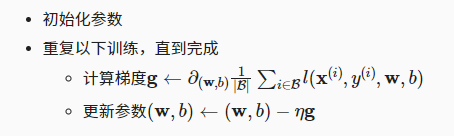


In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) #Loss of X and y
        #The shape of l sould be (batch_size, 1) not an scalar. to calculate the gradient of [w,b], we have to sum all of the element in l
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f"epoch{epoch+1}, loss {float(train_l.mean()):f}")

epoch1, loss 0.029206
epoch2, loss 0.000124
epoch3, loss 0.000050


In [ ]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0003, -0.0007], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)


In [ ]:
now_end = datetime.now().strftime("%Y-%m-%d %H:%M:%S %p")
print(f"Start at {now}")
print(f"End at {now_end}")

Start at 2024-03-25 15:58:46 PM
End at 2024-03-25 16:40:28 PM
